In [ ]:
%cd /content/drive/MyDrive/MCUT/R911R912
!ls

/content/drive/MyDrive/MCUT/R911R912
20220413		code	     test.csv
ARO1_pearsonr_corr.csv	data	     Untitled0.ipynb
ARO1特徵因子分析.ipynb	dataset.pkl  Untitled1.ipynb
ARO2_pearsonr_corr.csv	model
ARO2特徵因子分析.ipynb	PPT


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
df_x = pd.read_excel("data/ADS47/R911R912 _明志蔡教授_R4-ARO2.xlsx", sheet_name = "R911R912_TAG相關錶點資料(X)")

In [ ]:
df = df_x[["Unnamed: 0", "ARO2-DCS-PDI91101", "ARO2-DCS-PDI91201", "ARO2-DCS-FI91601", "ARO2-DCS-FI91701", "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water"]]
df["Unnamed: 0"] = range(60679)
df.loc[df["ARO2-LIMS-S905@Water"] == "Over Range", "ARO2-LIMS-S905@Water"] = np.nan
df.loc[df["ARO2-LIMS-S907@Water"] == "Over Range", "ARO2-LIMS-S907@Water"] = np.nan
# df = df[df["ARO2-LIMS-S905@Water"].notnull() & df["ARO2-LIMS-S907@Water"].notnull()]
# df.columns.values[0] = "time(hr)"
from tqdm import tqdm
for i in tqdm(df.columns):
    df[i] = pd.to_numeric(df[i], errors='coerce')

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
for i in range(len(df)-1):
  df.loc[i+1, "btw_t"] = df["Unnamed: 0"][i+1] - df["Unnamed: 0"][i]
  df.loc[i+1, "btw_ARO2-DCS-PDI91101"] = df["ARO2-DCS-PDI91101"][i+1] - df["ARO2-DCS-PDI91101"][i]
  df.loc[i+1, "btw_ARO2-DCS-PDI91201"] = df["ARO2-DCS-PDI91201"][i+1] - df["ARO2-DCS-PDI91201"][i]

df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,index,Unnamed: 0,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,btw_t,btw_ARO2-DCS-PDI91101,btw_ARO2-DCS-PDI91201
0,0,0,2.731854,3.547650,249.573349,500.489868,NaN,NaN,NaN,NaN,NaN
1,1,1,2.731864,3.547517,249.627914,500.495331,NaN,NaN,1.0,0.000010,-0.000133
2,2,2,2.731875,3.547384,249.682480,500.500793,NaN,NaN,1.0,0.000010,-0.000133
3,3,3,2.731885,3.547251,249.737045,500.506256,NaN,NaN,1.0,0.000010,-0.000133
4,4,4,2.731896,3.547118,249.791611,500.511719,NaN,NaN,1.0,0.000010,-0.000133
...,...,...,...,...,...,...,...,...,...,...,...
60674,60674,60674,3.376228,3.603930,545.488342,629.368591,NaN,NaN,1.0,0.051777,-0.007429
60675,60675,60675,3.378542,3.601583,508.997894,576.146851,NaN,NaN,1.0,0.002314,-0.002347
60676,60676,60676,3.397708,3.592693,541.041016,636.753174,NaN,NaN,1.0,0.019166,-0.008891
60677,60677,60677,3.344053,3.705959,547.967651,638.237244,NaN,NaN,1.0,-0.053655,0.113266


In [ ]:
df[df["ARO2-LIMS-S905@Water"].notnull() & df["ARO2-LIMS-S907@Water"].notnull()]

,Unnamed: 0,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,btw_t,btw_ARO2-DCS-PDI91101,btw_ARO2-DCS-PDI91201
5398,5398,2.527157,2.384864,460.908417,481.558197,76.967682,72.850731,1.0,0.103077,-0.207287
5734,5734,2.500865,2.445033,472.941071,486.401672,65.611740,64.290291,1.0,-0.183242,0.206301
6238,6238,2.603243,3.155497,515.500000,530.106689,97.714165,93.316444,1.0,-0.127408,0.105415
6740,6740,3.069072,2.669590,519.649231,532.807129,96.606339,90.777306,1.0,0.230996,-0.229197
6908,6908,3.121420,2.569182,516.041748,531.146973,92.104858,76.662498,1.0,0.134647,-0.132756
...,...,...,...,...,...,...,...,...,...,...
60559,60559,3.404090,3.598592,545.182617,631.100769,56.799999,66.050003,1.0,-0.007540,-0.002261
60583,60583,3.802518,3.108938,540.845825,631.270325,59.450001,62.209999,1.0,-0.022268,-0.008569
60607,60607,3.268492,3.481331,544.677246,637.143799,66.900002,68.099998,1.0,-0.012144,-0.185713
60631,60631,3.489918,3.514459,543.844421,628.028809,62.900002,75.900002,1.0,-0.011151,0.037815


In [ ]:
test_df = df.loc[df["btw_ARO2-DCS-PDI91101"] > 0, ["btw_ARO2-DCS-PDI91101", "btw_t", "ARO2-DCS-FI91601", "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water"]].reset_index()
test_df['ARO2-LIMS-S905@Water'].fillna(method='bfill', inplace=True)
test_df['ARO2-LIMS-S905@Water'].fillna(method='ffill', inplace=True)
test_df['ARO2-LIMS-S907@Water'].fillna(method='bfill', inplace=True)
test_df['ARO2-LIMS-S907@Water'].fillna(method='ffill', inplace=True)


In [ ]:
N = 0
for i in range(len(test_df)):
  if test_df["index"][i+1] == test_df["index"][i]+1:
    N = N + 1
  else:
    N = N + 1
    test_df.loc[i+1-N, "time"] = N
    test_df.loc[i+1-N, "mean_ARO2-DCS-PDI91101"] = test_df.loc[i+1-N:i+1, "btw_ARO2-DCS-PDI91101"].mean()
    N = 0

In [ ]:
row = test_df[test_df["time"].notnull()].index.tolist()
for i in range(len(row)):
  pca = PCA(n_components = 1)
  X = test_df.loc[row[i]:row[i+1], ["ARO2-DCS-FI91601",  "ARO2-LIMS-S905@Water", "ARO2-LIMS-S907@Water"]]
  pca.fit(X)
  test_df.loc[row[i]:row[i+1], "pca"]  = pca.transform(X).reshape(X.shape[0],).tolist()

In [ ]:
plt_df = test_df[test_df["time"].notnull()]

In [ ]:
plt_df

,index,btw_ARO2-DCS-PDI91101,btw_t,ARO2-DCS-FI91601,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,time,mean_ARO2-DCS-PDI91101,pca
0,1,0.000010,1.0,249.627914,76.967682,72.850731,4616.0,0.000150,-125.930857
4616,4619,0.384110,1.0,502.728241,76.967682,72.850731,2.0,0.294011,-0.235321
4618,4623,0.424941,1.0,501.661041,76.967682,72.850731,1.0,0.366799,2.418793
4619,4627,0.308657,1.0,506.498627,76.967682,72.850731,1.0,0.209709,0.456223
4620,4630,0.110760,1.0,505.586182,76.967682,72.850731,2.0,0.226344,-1.877462
...,...,...,...,...,...,...,...,...,...
31568,60647,0.126013,1.0,538.639221,66.309998,84.019997,5.0,0.103999,-8.299093
31573,60654,0.064367,1.0,545.052246,66.309998,84.019997,1.0,0.070849,0.855591
31574,60657,0.077332,1.0,546.763428,66.309998,84.019997,3.0,0.035333,-0.043671
31577,60662,0.020122,1.0,548.314514,66.309998,84.019997,1.0,0.010121,0.310852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


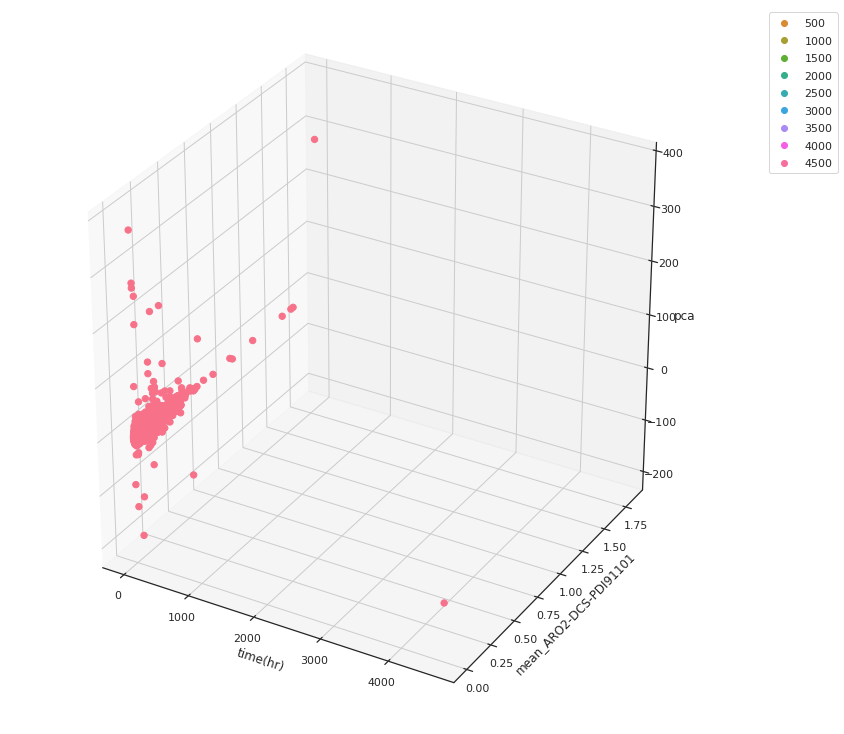

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


# sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

x = plt_df['time']
y = plt_df['mean_ARO2-DCS-PDI91101']
z = plt_df['pca']

sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("time(hr)")
ax.set_ylabel("mean_ARO2-DCS-PDI91101")
ax.set_zlabel("pca")

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()
